In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def str2msec(timestamp: str, ms=False):
    hours, minutes, seconds, milliseconds = map(int, timestamp.split(":"))
    total = (hours * 60 * 60) + (minutes * 60) + (seconds) + milliseconds/10000
    if ms:
        return total*1000
    else:
        return int(total*10)/10

In [7]:
CSV_PATH = "Keynect pro 1.csv"
data = pd.read_csv(CSV_PATH, index_col=None)

In [ ]:
vbo = pd.read_csv('Keynect_ProMaster_0001_RAW.csv')

In [ ]:
CAN_ID_LIST = np.unique(data['CAN ID'])
data['Time_ms'] = [str2msec(i) for i in data['Time']]
TIME_LIST = np.unique(data['Time_ms'])

In [15]:
for id in CAN_ID_LIST:
    vbo[id] = [0] * len(vbo['time'])

In [16]:
Traffic_byte = []

for t in TIME_LIST:
    tmp = data[data['Time_ms']==t]
    Traffic_byte.append(np.sum(tmp['DLC']))


In [17]:
T_all = np.arange(np.min(TIME_LIST), np.max(TIME_LIST)+1, 1)
Traffic_byte_all = np.zeros_like(T_all)
for i, t in enumerate(TIME_LIST):
    Traffic_byte_all[np.where(T_all==t)] = Traffic_byte[i]
    


Text(0, 0.5, 'Traffic [kB/s]')

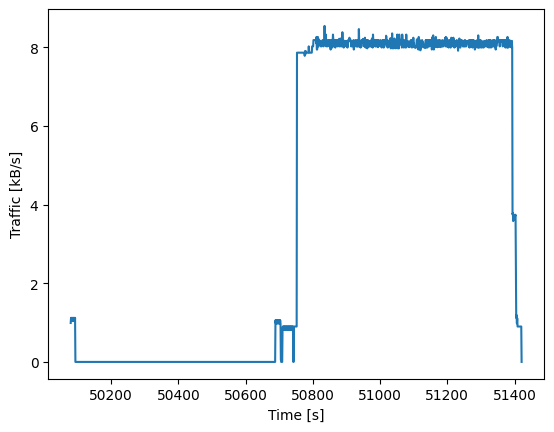

In [19]:
plt.plot(T_all, Traffic_byte_all/100)
plt.xlabel('Time [s]')
plt.ylabel('Traffic [kB/s]')

50751.9 4622.9


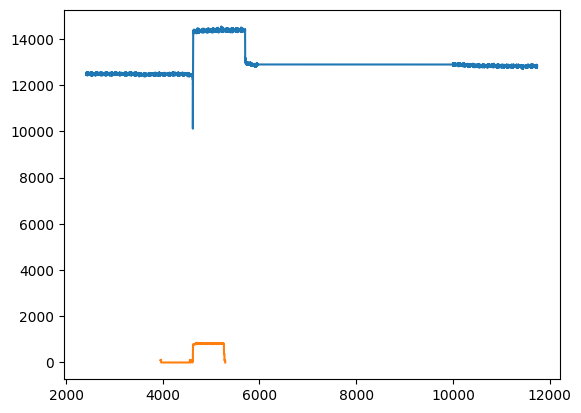

In [ ]:
vbo_t = np.array(vbo['time'])
vbo_v = np.array(vbo['IVT_Result_U1'])

t_max_can = T_all[np.argmax(np.diff(Traffic_byte_all))]
t_max_vbo = vbo_t[np.argmax(np.diff(vbo_v))]
print(t_max_can, t_max_vbo)

T_all += t_max_vbo - t_max_can

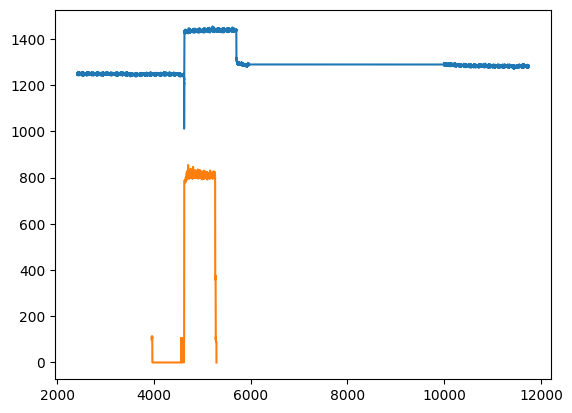

In [24]:
plt.plot(vbo_t, vbo_v/10)
# plt.plot(np.array(vbo['time']), np.array(vbo['IVT_Result_U1'])/1000)
plt.plot(T_all, Traffic_byte_all)